# Connect to G-Drive

In [ ]:
# Mount Google Drive
# from google.colab import drive
# drive.mount('/content/drive')

## Change Notebook Default Directory

In [ ]:
import os
file_dir = "/home/tyo/Documents/"
os.chdir(file_dir)

In [ ]:
!ls

 2023-05-15_00-30.png
 39_NugrohoBudiPrasetyo.docm
 39_NugrohoBudiPrasetyo.pdf
 batch_32
'Bootcamp Digital Skola'
 catatan
'[Cleaned]Laptop_Price.csv'
 contoh.ipynb
 crying_detector.ipynb
 crying_detector_v1.ipynb
 dataset
'Data Visualization Matplotlib'
 g1_batch32
 GitHub
'Homework - SQL.odt'
'Homework - SQL.pdf'
 ICEBEHI_2023_paper_LNEE_39_docxver.docx
 ICEBEHI_2023_paper_LNEE_39_rev1.docm
 ICEBEHI_2023_paper_LNEE_39_rev1.docx
 ijazah-min.jpg
 Laptop_Price.csv
 models
 Nugroho-Budi-Prasetyo
 onnx_export.py
 OPLIB
 Preparation_for_Git_Version_Control.docx_0.odt
'[Sandbox]_DS_Project_1_Laptop_Price_Dataset_EDA.ipynb'
 SLIP.pdf
 tfdc.png
 track.py
 train_ssd.py


# Import Libraries

In [ ]:
# Data Analysis Libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# Data Viz Libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.despine()
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc("axes",
       labelweight="bold",
       labelsize="large",
       titleweight="bold",
       titlesize=14,
       titlepad=10
)

# RegEx
import regex as re

<Figure size 640x480 with 0 Axes>

# Load Dataset

In [ ]:
csv_filename = "Laptop_Price.csv"
df = pd.read_csv(csv_filename)
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


## DataFrame's Info

In [ ]:
# DataFrame shape
df.shape

(1303, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


Observations:

* Dataset ini memiliki 1303 entri (baris) dan 13 kolom.
* Tidak terdapat nilai yang hilang dalam dataset.
* Jenis data pada setiap kolom telah sesuai dengan informasi yang diharapkan.




## Describe Dataframe

In [ ]:
df.describe()

,laptop_ID,Inches,Price_euros
count,1303.000000,1303.000000,1303.000000
mean,660.155794,15.017191,1123.686992
std,381.172104,1.426304,699.009043
min,1.000000,10.100000,174.000000
25%,331.500000,14.000000,599.000000
50%,659.000000,15.600000,977.000000
75%,990.500000,15.600000,1487.880000
max,1320.000000,18.400000,6099.000000


Using the '**describe**' method of the dataframe, we can get some first insights on the numerical columns.

Observations:

1. Laptop_id

* Kolom Laptop_ID mewakili pengidentifikasi unik untuk setiap laptop.
* Terdapat 1303 laptop dalam dataset.
* Laptop_ID minimum adalah 1, dan maksimumnya adalah 1320.*
* Laptop_ID rata-rata sekitar 660, menunjukkan distribusi ID yang relatif merata.
* Standar deviasinya sekitar 381, menunjukkan sebaran ID di sekitar mean.
* Kuartil memberikan wawasan tentang distribusi Laptop_ID dalam dataset.

2. Inches

* Kolom Inches mewakili ukuran layar laptop.
* Terdapat 1303 entri untuk ukuran layar.
* Ukuran layar rata-ratanya sekitar 15.02 inci.
* Standar deviasinya relatif kecil (1.43), menunjukkan bahwa sebagian besar laptop memiliki ukuran layar yang mendekati rata-rata.
* Ukuran layar minimum adalah 10.1 inci, dan maksimumnya adalah 18.4 inci.
* Kuartil memberikan wawasan tentang distribusi ukuran layar dalam dataset.

3. Price_euros:

* Kolom Price_euros mewakili harga laptop dalam euro.
* Terdapat 1303 entri untuk harga laptop.
* Harga rata-ratanya sekitar 1123.69 euro.
* Standar deviasinya relatif tinggi (699.01), menunjukkan variasi harga laptop yang signifikan.
* Harga minimum adalah 174 euro, dan maksimumnya adalah 6099 euro.
* Kuartil memberikan wawasan tentang distribusi harga dalam dataset.

#### Kesimpulan

* Dataset ini mencakup berbagai macam laptop dalam hal Laptop_ID, ukuran layar, dan harga.
* Ukuran layar menunjukkan sebaran yang relatif kecil di sekitar rata-rata, menunjukkan konsentrasi ukuran yang serupa.
* Harga bervariasi secara signifikan, dengan deviasi standar yang cukup tinggi.
* Kuartil memberikan gambaran tentang distribusi ukuran layar dan harga dalam dataset.

# Data Cleaning

## Lowering DataFrame's Column Names

In [ ]:
df = df.rename(columns=str.lower)

In [ ]:
df.head(5)

,laptop_id,company,product,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


## Check Missing Values

In [ ]:
df.isnull().sum()

laptop_id           0
company             0
product             0
typename            0
inches              0
screenresolution    0
cpu                 0
ram                 0
memory              0
gpu                 0
opsys               0
weight              0
price_euros         0
dtype: int64

## Check For Duplicates

In [ ]:
df.duplicated().sum()

0

# Data Cleaning + Feature Engineering (FE)

## Laptop ID

In [ ]:
df['laptop_id'].isnull().sum()

0

In [ ]:
df['laptop_id'].duplicated().sum()

0

In [ ]:
df = df.set_index('laptop_id')
df.head(5)

,company,product,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price_euros
laptop_id,,,,,,,,,,,,
1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


## Screen Resolution

In [ ]:
df['screenresolution'].isnull().sum()

0

In [ ]:
df['screenresolution'].duplicated().sum()

1263

In [ ]:
type(df['screenresolution']), df['screenresolution'].dtype

(pandas.core.series.Series, dtype('O'))

In [ ]:
df['screenresolution'] = df['screenresolution'].str.lower()
df

,company,product,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price_euros
laptop_id,,,,,,,,,,,,
1,Apple,MacBook Pro,Ultrabook,13.3,ips panel retina display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
3,HP,250 G6,Notebook,15.6,full hd 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
4,Apple,MacBook Pro,Ultrabook,15.4,ips panel retina display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
5,Apple,MacBook Pro,Ultrabook,13.3,ips panel retina display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...
1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,ips panel full hd / touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00
1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,ips panel quad hd+ / touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00
1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00


### FE on Screen Resolution

In [ ]:
df['screen_type'] = df['screenresolution'].str.extract(r'([a-zA-Z\s]+\s)')
df['resolution_width'] = df['screenresolution'].str.extract(r'(\d+)x(\d+)')[0].str.strip().astype('int64')
df['resolution_height'] = df['screenresolution'].str.extract(r'(\d+)x(\d+)')[1].str.strip().astype('int64')
df.head()

,company,product,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price_euros,screen_type,resolution_width,resolution_height
laptop_id,,,,,,,,,,,,,,,
1,Apple,MacBook Pro,Ultrabook,13.3,ips panel retina display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,ips panel retina display,2560,1600
2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,NaN,1440,900
3,HP,250 G6,Notebook,15.6,full hd 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,full hd,1920,1080
4,Apple,MacBook Pro,Ultrabook,15.4,ips panel retina display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,ips panel retina display,2880,1800
5,Apple,MacBook Pro,Ultrabook,13.3,ips panel retina display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,ips panel retina display,2560,1600


In [ ]:
df['screen_type'].isnull().sum(), df['resolution_width'].isnull().sum(), df['resolution_height'].isnull().sum()

(314, 0, 0)

In [ ]:
df['screen_type'] =  df['screen_type'].fillna('unknown')
df.head(5)

,company,product,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price_euros,screen_type,resolution_width,resolution_height
laptop_id,,,,,,,,,,,,,,,
1,Apple,MacBook Pro,Ultrabook,13.3,ips panel retina display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,ips panel retina display,2560,1600
2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,unknown,1440,900
3,HP,250 G6,Notebook,15.6,full hd 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,full hd,1920,1080
4,Apple,MacBook Pro,Ultrabook,15.4,ips panel retina display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,ips panel retina display,2880,1800
5,Apple,MacBook Pro,Ultrabook,13.3,ips panel retina display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,ips panel retina display,2560,1600


In [ ]:
df['touchscreen'] = np.where(df['screenresolution'].str.contains('touchscreen'), 1, 0)
df.head()

,company,product,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price_euros,screen_type,resolution_width,resolution_height,touchscreen
laptop_id,,,,,,,,,,,,,,,,
1,Apple,MacBook Pro,Ultrabook,13.3,ips panel retina display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,ips panel retina display,2560,1600,0
2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,unknown,1440,900,0
3,HP,250 G6,Notebook,15.6,full hd 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,full hd,1920,1080,0
4,Apple,MacBook Pro,Ultrabook,15.4,ips panel retina display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,ips panel retina display,2880,1800,0
5,Apple,MacBook Pro,Ultrabook,13.3,ips panel retina display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,ips panel retina display,2560,1600,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1303 entries, 1 to 1320
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   company            1303 non-null   object 
 1   product            1303 non-null   object 
 2   typename           1303 non-null   object 
 3   inches             1303 non-null   float64
 4   screenresolution   1303 non-null   object 
 5   cpu                1303 non-null   object 
 6   ram                1303 non-null   object 
 7   memory             1303 non-null   object 
 8   gpu                1303 non-null   object 
 9   opsys              1303 non-null   object 
 10  weight             1303 non-null   object 
 11  price_euros        1303 non-null   float64
 12  screen_type        1303 non-null   object 
 13  resolution_width   1303 non-null   int64  
 14  resolution_height  1303 non-null   int64  
 15  touchscreen        1303 non-null   int64  
dtypes: float64(2), int64(3),

In [ ]:
sum(df['touchscreen'] == 1)

192

In [ ]:
#clean data
df['screen_high_end'] = (
    (df['screen_type'].str.contains('ips', case=False)) |
    (df['resolution_width'] >= 2560) |
    (df['resolution_height'] >= 1600) |
    (df['touchscreen'] == 1)
)
df

,company,product,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price_euros,screen_type,resolution_width,resolution_height,touchscreen,screen_high_end
laptop_id,,,,,,,,,,,,,,,,,
1,Apple,MacBook Pro,Ultrabook,13.3,ips panel retina display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,ips panel retina display,2560,1600,0,True
2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,unknown,1440,900,0,False
3,HP,250 G6,Notebook,15.6,full hd 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,full hd,1920,1080,0,False
4,Apple,MacBook Pro,Ultrabook,15.4,ips panel retina display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,ips panel retina display,2880,1800,0,True
5,Apple,MacBook Pro,Ultrabook,13.3,ips panel retina display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,ips panel retina display,2560,1600,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,ips panel full hd / touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00,ips panel full hd,1920,1080,1,True
1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,ips panel quad hd+ / touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00,ips panel quad,3200,1800,1,True
1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00,unknown,1366,768,0,False


## CPU

In [ ]:
df['cpu'] = df['cpu'].str.lower()
df

,company,product,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price_euros,screen_type,resolution_width,resolution_height,touchscreen,screen_high_end
laptop_id,,,,,,,,,,,,,,,,,
1,Apple,MacBook Pro,Ultrabook,13.3,ips panel retina display 2560x1600,intel core i5 2.3ghz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,ips panel retina display,2560,1600,0,True
2,Apple,Macbook Air,Ultrabook,13.3,1440x900,intel core i5 1.8ghz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,unknown,1440,900,0,False
3,HP,250 G6,Notebook,15.6,full hd 1920x1080,intel core i5 7200u 2.5ghz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,full hd,1920,1080,0,False
4,Apple,MacBook Pro,Ultrabook,15.4,ips panel retina display 2880x1800,intel core i7 2.7ghz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,ips panel retina display,2880,1800,0,True
5,Apple,MacBook Pro,Ultrabook,13.3,ips panel retina display 2560x1600,intel core i5 3.1ghz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,ips panel retina display,2560,1600,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,ips panel full hd / touchscreen 1920x1080,intel core i7 6500u 2.5ghz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00,ips panel full hd,1920,1080,1,True
1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,ips panel quad hd+ / touchscreen 3200x1800,intel core i7 6500u 2.5ghz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00,ips panel quad,3200,1800,1,True
1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,intel celeron dual core n3050 1.6ghz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00,unknown,1366,768,0,False


In [ ]:
df['cpu'] = df['cpu'].str.replace('e-series', '')
df['cpu'] = df['cpu'].str.replace('e2-', 'e2 ')
df['cpu_type'] = df['cpu'].str.extract(r'(^\w+)')
df['clock_speed'] = df['cpu'].str.extract(r'(\d(?:\.\d+)?)ghz').astype('float64')
df['generation'] = df['cpu'].str.extract(r'(\d{4})').astype('float64')
df['generation'] = df['generation'].fillna(0)
df

,company,product,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price_euros,screen_type,resolution_width,resolution_height,touchscreen,screen_high_end,cpu_type,clock_speed,generation
laptop_id,,,,,,,,,,,,,,,,,,,,
1,Apple,MacBook Pro,Ultrabook,13.3,ips panel retina display 2560x1600,intel core i5 2.3ghz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,ips panel retina display,2560,1600,0,True,intel,2.3,0.0
2,Apple,Macbook Air,Ultrabook,13.3,1440x900,intel core i5 1.8ghz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,unknown,1440,900,0,False,intel,1.8,0.0
3,HP,250 G6,Notebook,15.6,full hd 1920x1080,intel core i5 7200u 2.5ghz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,full hd,1920,1080,0,False,intel,2.5,7200.0
4,Apple,MacBook Pro,Ultrabook,15.4,ips panel retina display 2880x1800,intel core i7 2.7ghz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,ips panel retina display,2880,1800,0,True,intel,2.7,0.0
5,Apple,MacBook Pro,Ultrabook,13.3,ips panel retina display 2560x1600,intel core i5 3.1ghz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,ips panel retina display,2560,1600,0,True,intel,3.1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,ips panel full hd / touchscreen 1920x1080,intel core i7 6500u 2.5ghz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00,ips panel full hd,1920,1080,1,True,intel,2.5,6500.0
1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,ips panel quad hd+ / touchscreen 3200x1800,intel core i7 6500u 2.5ghz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00,ips panel quad,3200,1800,1,True,intel,2.5,6500.0
1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,intel celeron dual core n3050 1.6ghz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00,unknown,1366,768,0,False,intel,1.6,3050.0


In [ ]:
df['cpu'] = df['cpu'].str.lower()
high_end_cpu = (
    (df['cpu'].str.contains('ryzen', case=False)) |
    (df['cpu'].str.contains('core i7', case=False)) |
    ((df['generation'] >= 9700) & (df['cpu'].str.contains('amd a', case=False))) |
    ((df['generation'] >= 7200) & (df['cpu'].str.contains('intel core', case=False))) |
    (df['clock_speed'] >= 3))
df['high_end_cpu'] = high_end_cpu
df.head()

,company,product,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,...,price_euros,screen_type,resolution_width,resolution_height,touchscreen,screen_high_end,cpu_type,clock_speed,generation,high_end_cpu
laptop_id,,,,,,,,,,,,,,,,,,,,,
1,Apple,MacBook Pro,Ultrabook,13.3,ips panel retina display 2560x1600,intel core i5 2.3ghz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,...,1339.69,ips panel retina display,2560,1600,0,True,intel,2.3,0.0,False
2,Apple,Macbook Air,Ultrabook,13.3,1440x900,intel core i5 1.8ghz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,...,898.94,unknown,1440,900,0,False,intel,1.8,0.0,False
3,HP,250 G6,Notebook,15.6,full hd 1920x1080,intel core i5 7200u 2.5ghz,8GB,256GB SSD,Intel HD Graphics 620,No OS,...,575.00,full hd,1920,1080,0,False,intel,2.5,7200.0,True
4,Apple,MacBook Pro,Ultrabook,15.4,ips panel retina display 2880x1800,intel core i7 2.7ghz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,...,2537.45,ips panel retina display,2880,1800,0,True,intel,2.7,0.0,True
5,Apple,MacBook Pro,Ultrabook,13.3,ips panel retina display 2560x1600,intel core i5 3.1ghz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,...,1803.60,ips panel retina display,2560,1600,0,True,intel,3.1,0.0,True


In [ ]:
df.isnull().sum()

company              0
product              0
typename             0
inches               0
screenresolution     0
cpu                  0
ram                  0
memory               0
gpu                  0
opsys                0
weight               0
price_euros          0
screen_type          0
resolution_width     0
resolution_height    0
touchscreen          0
screen_high_end      0
cpu_type             0
clock_speed          0
generation           0
high_end_cpu         0
dtype: int64

## RAM

In [ ]:
df['total_ram'] = df['ram'].str.extract(r'(\d+)').astype('int64')
df['large_ram'] = ((df['total_ram'] >= 8))


## Memory (Drive)

In [ ]:
def total_storage(row):
    matches = re.findall(r'(\d+)tb|(\d+)gb', row)
    total_storage_gb = sum(int(tb) * 1000 if tb else int(gb) for tb, gb in matches)
    return total_storage_gb

In [ ]:
df['memory'] = df['memory'].str.lower()
df['total_storage (GB)'] = df['memory'].apply(total_storage)
good_storage = (
    (df['memory'].str.contains('ssd', case=False)) &
    (df['total_storage (GB)'] > 128)
)
df['good_storage'] = good_storage
df

,company,product,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,...,touchscreen,screen_high_end,cpu_type,clock_speed,generation,high_end_cpu,total_ram,large_ram,total_storage (GB),good_storage
laptop_id,,,,,,,,,,,,,,,,,,,,,
1,Apple,MacBook Pro,Ultrabook,13.3,ips panel retina display 2560x1600,intel core i5 2.3ghz,8GB,128gb ssd,Intel Iris Plus Graphics 640,macOS,...,0,True,intel,2.3,0.0,False,8,True,128,False
2,Apple,Macbook Air,Ultrabook,13.3,1440x900,intel core i5 1.8ghz,8GB,128gb flash storage,Intel HD Graphics 6000,macOS,...,0,False,intel,1.8,0.0,False,8,True,128,False
3,HP,250 G6,Notebook,15.6,full hd 1920x1080,intel core i5 7200u 2.5ghz,8GB,256gb ssd,Intel HD Graphics 620,No OS,...,0,False,intel,2.5,7200.0,True,8,True,256,True
4,Apple,MacBook Pro,Ultrabook,15.4,ips panel retina display 2880x1800,intel core i7 2.7ghz,16GB,512gb ssd,AMD Radeon Pro 455,macOS,...,0,True,intel,2.7,0.0,True,16,True,512,True
5,Apple,MacBook Pro,Ultrabook,13.3,ips panel retina display 2560x1600,intel core i5 3.1ghz,8GB,256gb ssd,Intel Iris Plus Graphics 650,macOS,...,0,True,intel,3.1,0.0,True,8,True,256,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,ips panel full hd / touchscreen 1920x1080,intel core i7 6500u 2.5ghz,4GB,128gb ssd,Intel HD Graphics 520,Windows 10,...,1,True,intel,2.5,6500.0,True,4,False,128,False
1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,ips panel quad hd+ / touchscreen 3200x1800,intel core i7 6500u 2.5ghz,16GB,512gb ssd,Intel HD Graphics 520,Windows 10,...,1,True,intel,2.5,6500.0,True,16,True,512,True
1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,intel celeron dual core n3050 1.6ghz,2GB,64gb flash storage,Intel HD Graphics,Windows 10,...,0,False,intel,1.6,3050.0,False,2,False,64,False


## Weight

In [ ]:
df['weight (KG)'] = df['weight'].str.extract(r'(\d+\.\d+)kg').astype('float64')
df = df.drop(columns=['weight'])
good_weight = ((df['weight (KG)'] < 2))
df['low_weight'] = good_weight
df.head()

,company,product,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,...,cpu_type,clock_speed,generation,high_end_cpu,total_ram,large_ram,total_storage (GB),good_storage,weight (KG),low_weight
laptop_id,,,,,,,,,,,,,,,,,,,,,
1,Apple,MacBook Pro,Ultrabook,13.3,ips panel retina display 2560x1600,intel core i5 2.3ghz,8GB,128gb ssd,Intel Iris Plus Graphics 640,macOS,...,intel,2.30,0.0,False,8,True,128,False,1.37,True
2,Apple,Macbook Air,Ultrabook,13.3,1440x900,intel core i5 1.8ghz,8GB,128gb flash storage,Intel HD Graphics 6000,macOS,...,intel,1.80,0.0,False,8,True,128,False,1.34,True
3,HP,250 G6,Notebook,15.6,full hd 1920x1080,intel core i5 7200u 2.5ghz,8GB,256gb ssd,Intel HD Graphics 620,No OS,...,intel,2.50,7200.0,True,8,True,256,True,1.86,True
4,Apple,MacBook Pro,Ultrabook,15.4,ips panel retina display 2880x1800,intel core i7 2.7ghz,16GB,512gb ssd,AMD Radeon Pro 455,macOS,...,intel,2.70,0.0,True,16,True,512,True,1.83,True
5,Apple,MacBook Pro,Ultrabook,13.3,ips panel retina display 2560x1600,intel core i5 3.1ghz,8GB,256gb ssd,Intel Iris Plus Graphics 650,macOS,...,intel,3.10,0.0,True,8,True,256,True,1.37,True
6,Acer,Aspire 3,Notebook,15.6,1366x768,amd a9-series 9420 3ghz,4GB,500gb hdd,AMD Radeon R5,Windows 10,...,amd,3.00,9420.0,True,4,False,500,False,2.10,False
7,Apple,MacBook Pro,Ultrabook,15.4,ips panel retina display 2880x1800,intel core i7 2.2ghz,16GB,256gb flash storage,Intel Iris Pro Graphics,Mac OS X,...,intel,2.20,0.0,True,16,True,256,False,2.04,False
8,Apple,Macbook Air,Ultrabook,13.3,1440x900,intel core i5 1.8ghz,8GB,256gb flash storage,Intel HD Graphics 6000,macOS,...,intel,1.80,0.0,False,8,True,256,False,1.34,True
9,Asus,ZenBook UX430UN,Ultrabook,14.0,full hd 1920x1080,intel core i7 8550u 1.8ghz,16GB,512gb ssd,Nvidia GeForce MX150,Windows 10,...,intel,1.80,8550.0,True,16,True,512,True,1.30,True


## CPU & GPU Manifacturing Companies

In [ ]:
df['gpu'] = df['gpu'].str.lower()
df['gpu_type'] = df['gpu'].str.extract(r'(^\w+)')
df

,company,product,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,...,clock_speed,generation,high_end_cpu,total_ram,large_ram,total_storage (GB),good_storage,weight (KG),low_weight,gpu_type
laptop_id,,,,,,,,,,,,,,,,,,,,,
1,Apple,MacBook Pro,Ultrabook,13.3,ips panel retina display 2560x1600,intel core i5 2.3ghz,8GB,128gb ssd,intel iris plus graphics 640,macOS,...,2.3,0.0,False,8,True,128,False,1.37,True,intel
2,Apple,Macbook Air,Ultrabook,13.3,1440x900,intel core i5 1.8ghz,8GB,128gb flash storage,intel hd graphics 6000,macOS,...,1.8,0.0,False,8,True,128,False,1.34,True,intel
3,HP,250 G6,Notebook,15.6,full hd 1920x1080,intel core i5 7200u 2.5ghz,8GB,256gb ssd,intel hd graphics 620,No OS,...,2.5,7200.0,True,8,True,256,True,1.86,True,intel
4,Apple,MacBook Pro,Ultrabook,15.4,ips panel retina display 2880x1800,intel core i7 2.7ghz,16GB,512gb ssd,amd radeon pro 455,macOS,...,2.7,0.0,True,16,True,512,True,1.83,True,amd
5,Apple,MacBook Pro,Ultrabook,13.3,ips panel retina display 2560x1600,intel core i5 3.1ghz,8GB,256gb ssd,intel iris plus graphics 650,macOS,...,3.1,0.0,True,8,True,256,True,1.37,True,intel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,ips panel full hd / touchscreen 1920x1080,intel core i7 6500u 2.5ghz,4GB,128gb ssd,intel hd graphics 520,Windows 10,...,2.5,6500.0,True,4,False,128,False,1.80,True,intel
1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,ips panel quad hd+ / touchscreen 3200x1800,intel core i7 6500u 2.5ghz,16GB,512gb ssd,intel hd graphics 520,Windows 10,...,2.5,6500.0,True,16,True,512,True,1.30,True,intel
1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,intel celeron dual core n3050 1.6ghz,2GB,64gb flash storage,intel hd graphics,Windows 10,...,1.6,3050.0,False,2,False,64,False,1.50,True,intel


In [ ]:
integrated_gpu = ((df['gpu_type'].str.contains('amd', case=False))|
                 (df['gpu_type'].str.contains('intel', case=False)))
df['integrated_gpu'] = integrated_gpu
df

,company,product,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,...,generation,high_end_cpu,total_ram,large_ram,total_storage (GB),good_storage,weight (KG),low_weight,gpu_type,integrated_gpu
laptop_id,,,,,,,,,,,,,,,,,,,,,
1,Apple,MacBook Pro,Ultrabook,13.3,ips panel retina display 2560x1600,intel core i5 2.3ghz,8GB,128gb ssd,intel iris plus graphics 640,macOS,...,0.0,False,8,True,128,False,1.37,True,intel,True
2,Apple,Macbook Air,Ultrabook,13.3,1440x900,intel core i5 1.8ghz,8GB,128gb flash storage,intel hd graphics 6000,macOS,...,0.0,False,8,True,128,False,1.34,True,intel,True
3,HP,250 G6,Notebook,15.6,full hd 1920x1080,intel core i5 7200u 2.5ghz,8GB,256gb ssd,intel hd graphics 620,No OS,...,7200.0,True,8,True,256,True,1.86,True,intel,True
4,Apple,MacBook Pro,Ultrabook,15.4,ips panel retina display 2880x1800,intel core i7 2.7ghz,16GB,512gb ssd,amd radeon pro 455,macOS,...,0.0,True,16,True,512,True,1.83,True,amd,True
5,Apple,MacBook Pro,Ultrabook,13.3,ips panel retina display 2560x1600,intel core i5 3.1ghz,8GB,256gb ssd,intel iris plus graphics 650,macOS,...,0.0,True,8,True,256,True,1.37,True,intel,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,ips panel full hd / touchscreen 1920x1080,intel core i7 6500u 2.5ghz,4GB,128gb ssd,intel hd graphics 520,Windows 10,...,6500.0,True,4,False,128,False,1.80,True,intel,True
1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,ips panel quad hd+ / touchscreen 3200x1800,intel core i7 6500u 2.5ghz,16GB,512gb ssd,intel hd graphics 520,Windows 10,...,6500.0,True,16,True,512,True,1.30,True,intel,True
1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,intel celeron dual core n3050 1.6ghz,2GB,64gb flash storage,intel hd graphics,Windows 10,...,3050.0,False,2,False,64,False,1.50,True,intel,True


Now the dataset looks clean and ready to be explored

In [ ]:
df.to_csv('[Cleaned]Laptop_Price.csv', index=False)

# Exploratory Data Analysis (EDA)

## Load Cleaned Dataset

In [ ]:
df_price_comparison = df.copy()
df_price_comparison = df_price_comparison.filter(items=['price_euros','screen_high_end','high_end_cpu','large_ram',
                                                  'good_storage', 'low_weight', 'integrated_gpu'])
df_price_comparison

,price_euros,screen_high_end,high_end_cpu,large_ram,good_storage,low_weight,integrated_gpu
laptop_id,,,,,,,
1,1339.69,True,False,True,False,True,True
2,898.94,False,False,True,False,True,True
3,575.00,False,True,True,True,True,True
4,2537.45,True,True,True,True,True,True
5,1803.60,True,True,True,True,True,True
...,...,...,...,...,...,...,...
1316,638.00,True,True,False,False,True,True
1317,1499.00,True,True,True,True,True,True
1318,229.00,False,False,False,False,True,True


In [ ]:
df

,company,product,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,...,generation,high_end_cpu,total_ram,large_ram,total_storage (GB),good_storage,weight (KG),low_weight,gpu_type,integrated_gpu
laptop_id,,,,,,,,,,,,,,,,,,,,,
1,Apple,MacBook Pro,Ultrabook,13.3,ips panel retina display 2560x1600,intel core i5 2.3ghz,8GB,128gb ssd,intel iris plus graphics 640,macOS,...,0.0,False,8,True,128,False,1.37,True,intel,True
2,Apple,Macbook Air,Ultrabook,13.3,1440x900,intel core i5 1.8ghz,8GB,128gb flash storage,intel hd graphics 6000,macOS,...,0.0,False,8,True,128,False,1.34,True,intel,True
3,HP,250 G6,Notebook,15.6,full hd 1920x1080,intel core i5 7200u 2.5ghz,8GB,256gb ssd,intel hd graphics 620,No OS,...,7200.0,True,8,True,256,True,1.86,True,intel,True
4,Apple,MacBook Pro,Ultrabook,15.4,ips panel retina display 2880x1800,intel core i7 2.7ghz,16GB,512gb ssd,amd radeon pro 455,macOS,...,0.0,True,16,True,512,True,1.83,True,amd,True
5,Apple,MacBook Pro,Ultrabook,13.3,ips panel retina display 2560x1600,intel core i5 3.1ghz,8GB,256gb ssd,intel iris plus graphics 650,macOS,...,0.0,True,8,True,256,True,1.37,True,intel,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,ips panel full hd / touchscreen 1920x1080,intel core i7 6500u 2.5ghz,4GB,128gb ssd,intel hd graphics 520,Windows 10,...,6500.0,True,4,False,128,False,1.80,True,intel,True
1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,ips panel quad hd+ / touchscreen 3200x1800,intel core i7 6500u 2.5ghz,16GB,512gb ssd,intel hd graphics 520,Windows 10,...,6500.0,True,16,True,512,True,1.30,True,intel,True
1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,intel celeron dual core n3050 1.6ghz,2GB,64gb flash storage,intel hd graphics,Windows 10,...,3050.0,False,2,False,64,False,1.50,True,intel,True


## Custom functions to improve plot readability

In [ ]:
def num_plot(df, col, title, symb):
    fig, ax = plt.subplots(2, 1, sharex=True, figsize=(8,5),gridspec_kw={"height_ratios": (.2, .8)})
    ax[0].set_title(title,fontsize=18)
    sns.boxplot(x=col, data=df, ax=ax[0])
    ax[0].set(yticks=[])
    sns.histplot(x=col, data=df, ax=ax[1])
    ax[1].set_xlabel(col, fontsize=16)
    plt.axvline(df[col].mean(), color='darkgreen', linewidth=2.2, label='mean=' + str(np.round(df[col].mean(),1)) + symb)
    plt.axvline(df[col].median(), color='red', linewidth=2.2, label='median='+ str(np.round(df[col].median(),1)) + symb)
    plt.axvline(df[col].mode()[0], color='purple', linewidth=2.2, label='mode='+ str(df[col].mode()[0]) + symb)
    plt.legend(bbox_to_anchor=(1, 1.03), ncol=1, fontsize=17, fancybox=True, shadow=True, frameon=True)
    plt.tight_layout()
    plt.show()

## Which brand is the most frequent in the dataframe?

In [ ]:
print('Brand:', df.iloc[(df['company'].value_counts().max())][0] + '\nValue:',df['company'].value_counts().max())

Brand: Dell
Value: 297


## What type of laptop is the most frequent?

In [ ]:
print('Most freq laptop type:', df['typename'].value_counts().idxmax())

Most freq laptop type: Notebook


## Which size is the most popular?

In [ ]:
print('Most Popular Size:', df['inches'].value_counts().idxmax(), 'inches')

Most Popular Size: 15.6 inches


## How is weight distributed among the laptops?

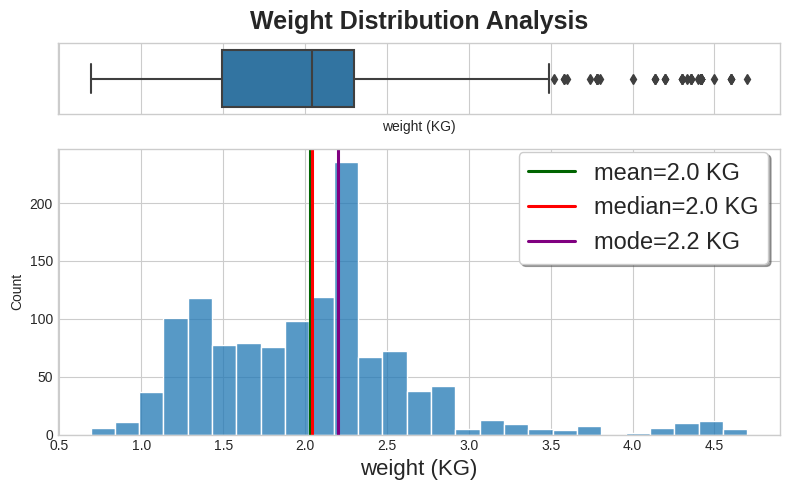

In [ ]:
num_plot(df, 'weight (KG)', 'Weight Distribution Analysis', ' KG')

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

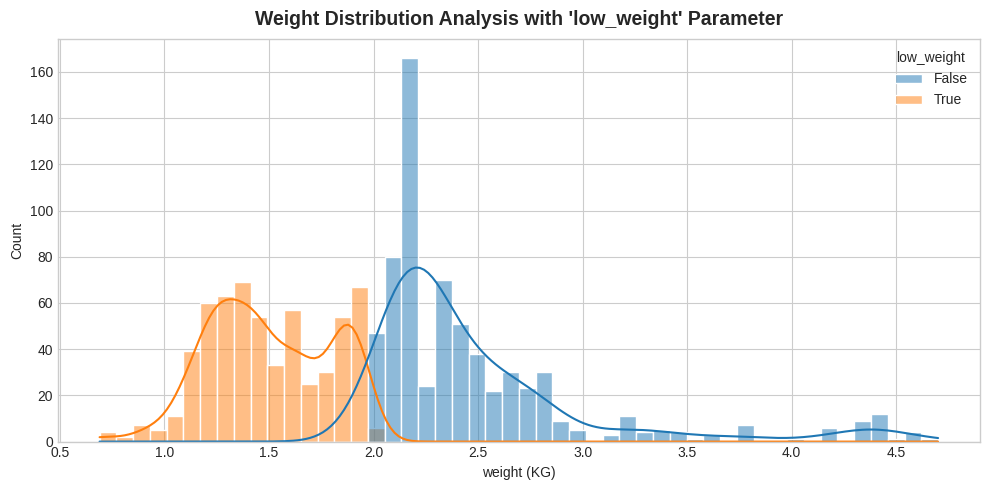

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(df, x='weight (KG)', kde=True, bins=50, hue='low_weight')
plt.title('Weight Distribution Analysis with \'low_weight\' Parameter')
plt.plot

## How is price distributed among the laptops?

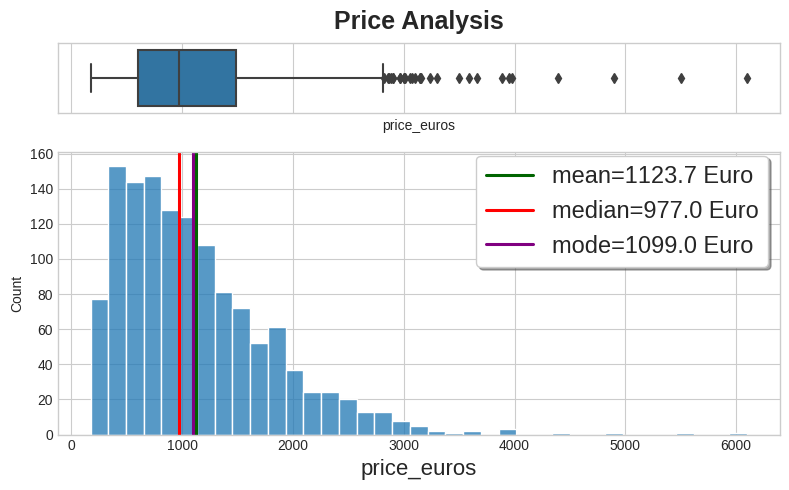

In [ ]:
num_plot(df, 'price_euros', 'Price Analysis', ' Euro')

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

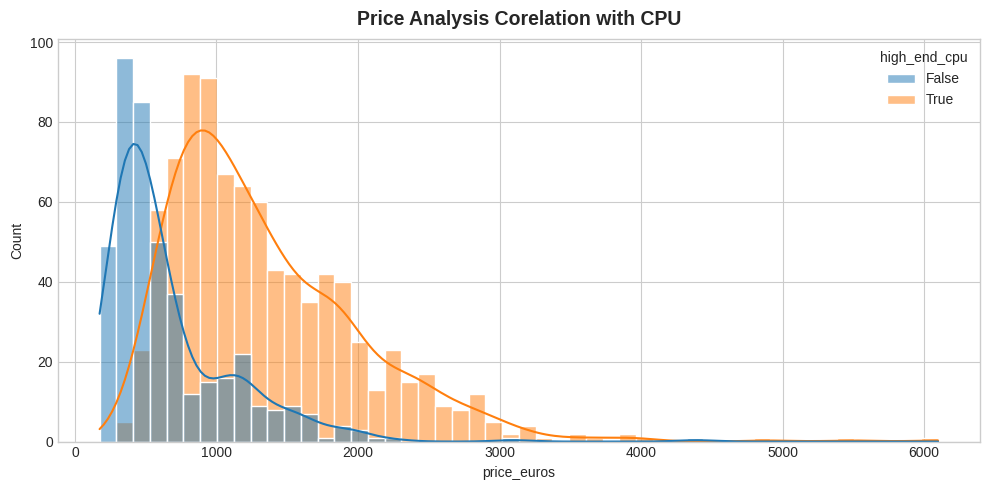

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(df, x='price_euros', kde=True, bins=50, hue='high_end_cpu')
plt.title('Price Analysis Corelation with CPU')
plt.plot

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

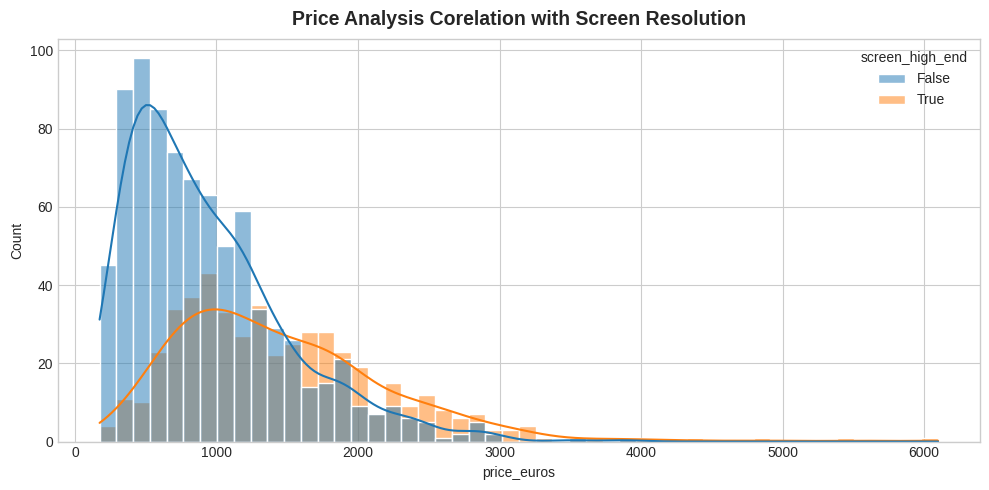

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(df, x='price_euros', kde=True, bins=50, hue='screen_high_end')
plt.title('Price Analysis Corelation with Screen Resolution')
plt.plot

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

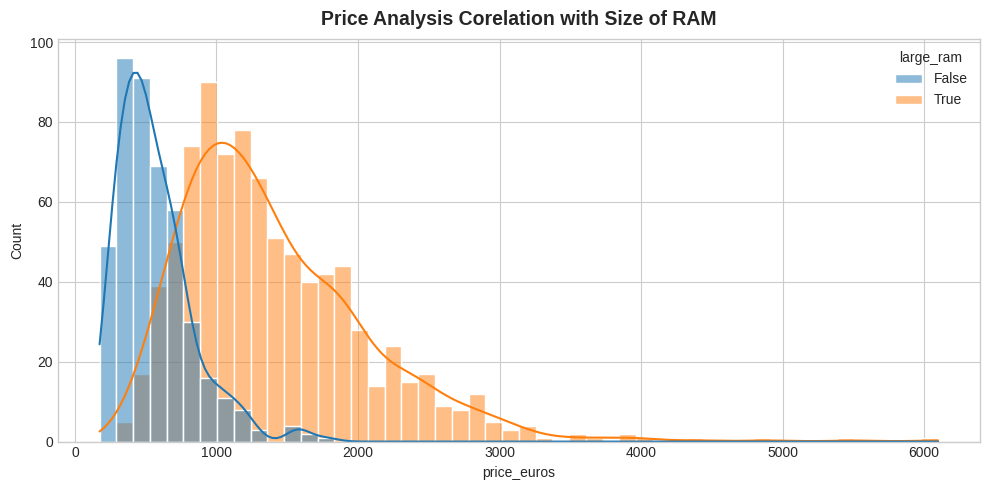

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(df, x='price_euros', kde=True, bins=50, hue='large_ram')
plt.title('Price Analysis Corelation with Size of RAM')
plt.plot

[]

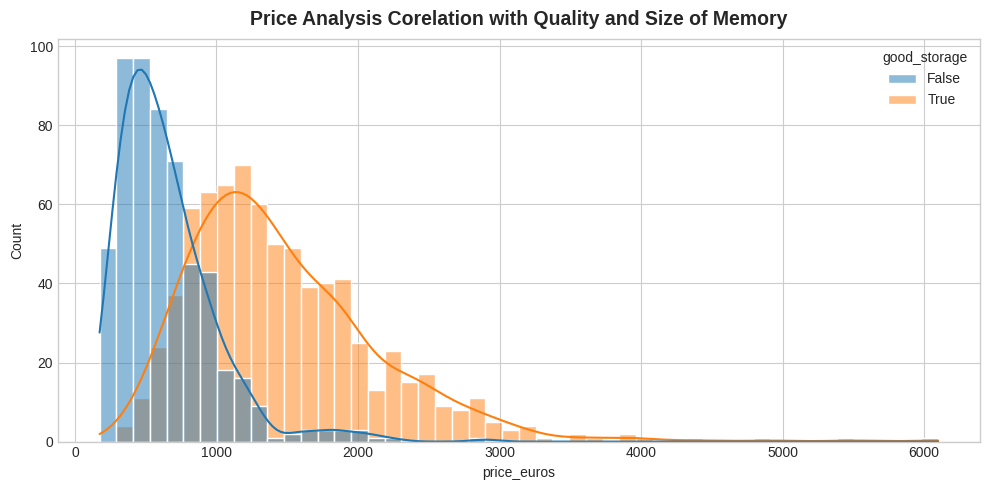

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(df, x='price_euros', kde=True, bins=50, hue='good_storage')
plt.title('Price Analysis Corelation with Quality and Size of Memory')
plt.plot()

[]

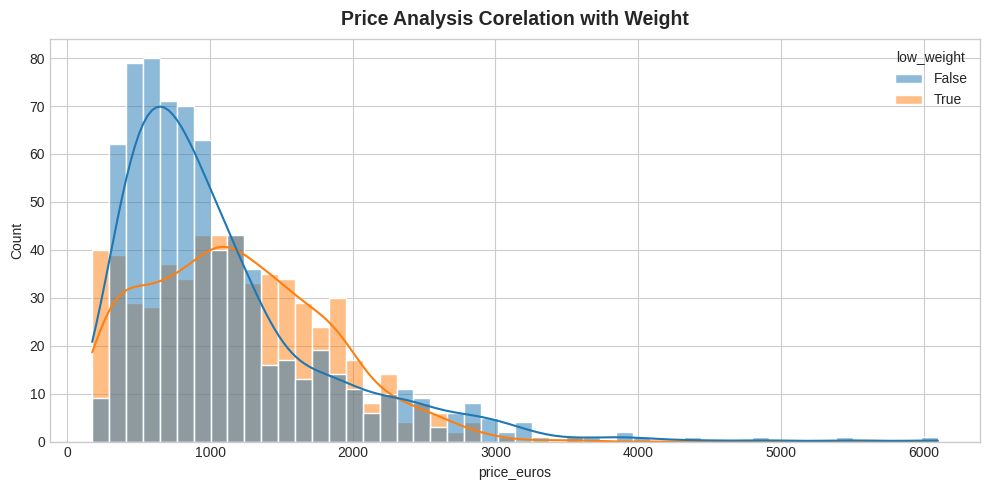

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(df, x='price_euros', kde=True, bins=50, hue='low_weight')
plt.title('Price Analysis Corelation with Weight')
plt.plot()

[]

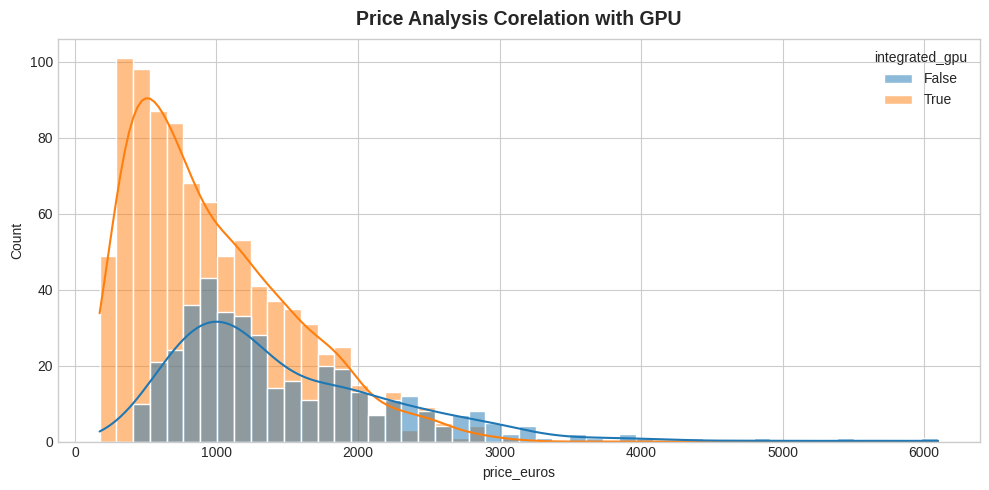

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(df, x='price_euros', kde=True, bins=50, hue='integrated_gpu')
plt.title('Price Analysis Corelation with GPU')
plt.plot()

## How is RAM distributed among the laptops?

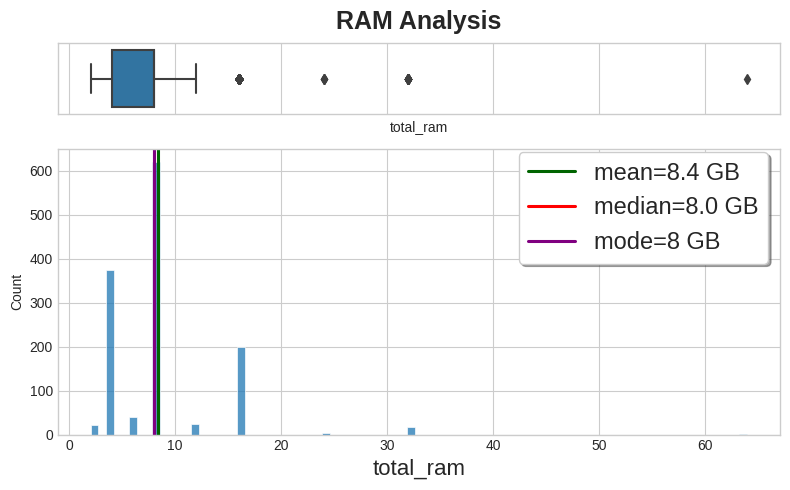

In [ ]:
num_plot(df, 'total_ram', 'RAM Analysis', ' GB')

## How is CPU frequency distributed among the laptops?

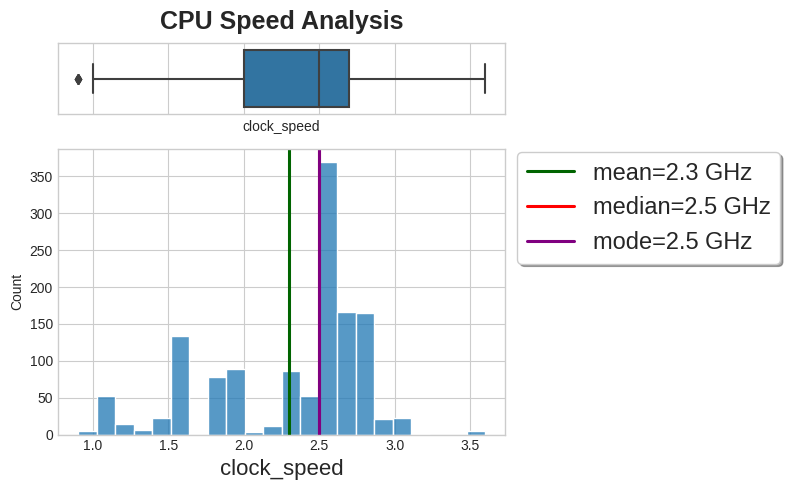

In [ ]:
num_plot(df, 'clock_speed', 'CPU Speed Analysis', ' GHz')

## How is Hard Drive capacity distributed among the laptops?

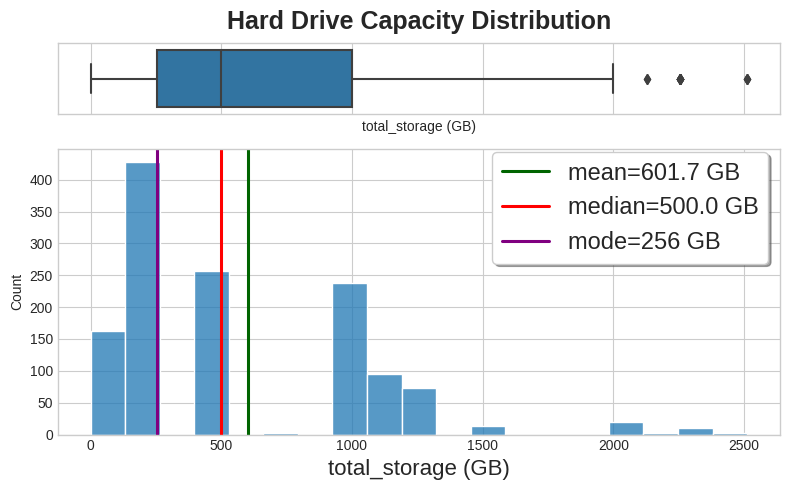

In [ ]:
num_plot(df, 'total_storage (GB)', 'Hard Drive Capacity Distribution', ' GB')

## Price VS CPU brand by GPU brand

[]

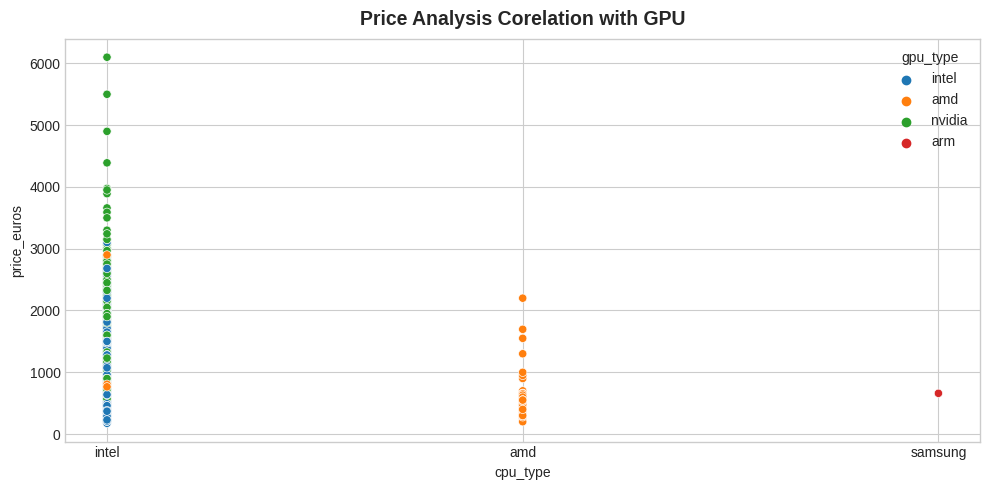

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(df, x='cpu_type', y='price_euros', hue='gpu_type')
plt.title('Price Analysis Corelation with GPU')
plt.plot()

Insights from this plot:

* Dari hasil perhitungan, merek 'Dell' muncul paling sering dalam dataframe dengan frekuensi sebanyak 297.
* Laptop tipe 'Notebook' mendominasi jumlah entri pada dataframe ini.
* Ukuran layar paling umum adalah 15.6 inci dalam dataframe ini.
* Sejumlah dataframe berada di luar kisaran normal pada distribusi laptop, terutama pada parameter berat. Rata-rata berat laptop adalah 2 kilogram, median juga 2 kilogram, dan berat yang paling sering muncul adalah 2.2 kilogram. Penggunaan parameter tambahan 'low_weight' menunjukkan bahwa sebagian besar distribusi laptop memiliki berat lebih dari 2 kilogram, dan hal ini dapat mempengaruhi pengguna yang mencari laptop yang lebih ringan.
* Pada data harga, beberapa entri berada di luar kisaran normal. Rata-rata harga laptop adalah 1123.7 euro, median 977.0 euro, dan harga yang paling sering muncul adalah 1099 euro. Analisis korelasi harga dengan CPU, resolusi layar, RAM, penyimpanan, berat, dan GPU menunjukkan bahwa parameter yang paling mempengaruhi harga adalah GPU yang bersifat dedicated, kualitas dan kapasitas penyimpanan, RAM, serta CPU dengan seri tertinggi. Hal ini tercermin dalam grafik dengan perbedaan warna yang jelas, menunjukkan bahwa semakin tinggi nilai parameter, semakin tinggi harga laptop. Kategori laptop yang umum masih mendominasi, dengan beberapa parameter yang diambil dari seri CPU terbaru, resolusi layar tinggi, RAM besar, penggunaan SSD, berat kurang dari 2 kilogram, dan penggunaan GPU yang bersifat dedicated atau integrated.
* Distribusi data kecepatan CPU menunjukkan rata-rata sekitar 2.3 GHz, median 2.5 GHz, dan kecepatan yang paling sering muncul adalah 2.5 GHz. Terdapat juga beberapa data outlier pada distribusi ini.
* Distribusi kapasitas penyimpanan menunjukkan rata-rata sekitar 601.7 GB, median 500 GB, dan kapasitas penyimpanan yang paling sering muncul adalah 256 GB.
* Pada perbandingan harga dengan CPU berdasarkan brand GPU, data menunjukkan bahwa CPU Intel dengan GPU bawaan Intel (integrated) memiliki harga terendah, sementara CPU Intel dengan GPU Nvidia memiliki harga tertinggi. CPU AMD umumnya menggunakan GPU bawaan mereka sendiri dengan harga yang lebih rendah dibandingkan dengan CPU Intel yang menggunakan GPU Nvidia. Samsung, dengan arsitektur CPU ARM, memiliki harga yang tidak lebih baik dibandingkan dengan brand AMD.

## Which are the TOP 15 most common GPUs?

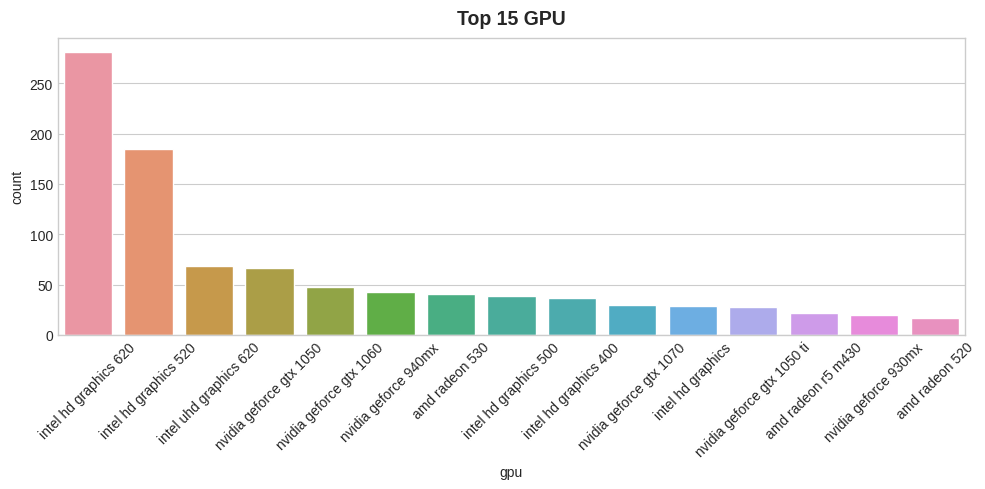

In [ ]:
top_15_gpu = df['gpu'].value_counts().head(15).index
df_filtered = df[df['gpu'].isin(top_15_gpu)]
order = df_filtered['gpu'].value_counts().index
plt.figure(figsize=(10, 5))
sns.countplot(x='gpu', data=df_filtered, order=order)
plt.title('Top 15 GPU')
plt.xticks(rotation=45)
plt.show()

## Which are the TOP 15 most common CPUs?

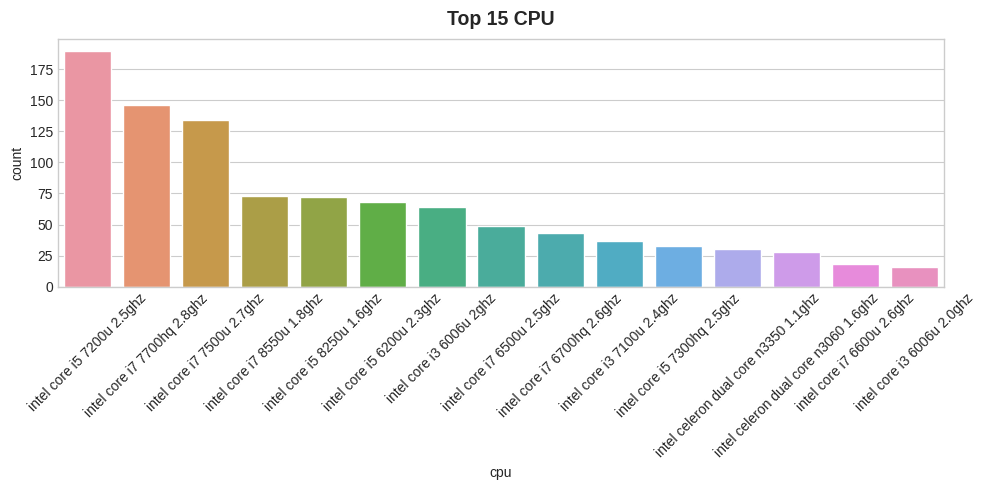

In [ ]:
top_15_cpu = df['cpu'].value_counts().head(15).index
df_filtered_cpu = df[df['cpu'].isin(top_15_cpu)]
order_cpu = df_filtered_cpu['cpu'].value_counts().index
plt.figure(figsize=(10, 5))
sns.countplot(x='cpu', data=df_filtered_cpu, order=order_cpu)
plt.title('Top 15 CPU')
plt.xticks(rotation=45)
plt.show()

## What is the average price of laptops by company?

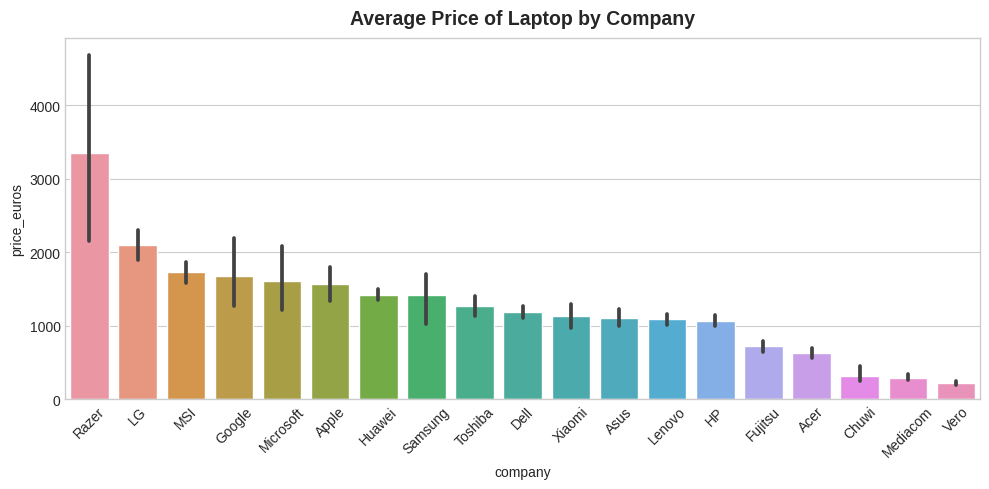

In [ ]:
avg_price = df.groupby('company')['price_euros'].mean().sort_values(ascending=False)
order_company = avg_price.index
plt.figure(figsize=(10, 5))
sns.barplot(x='company', y='price_euros', data=df, order=order_company)
plt.title('Average Price of Laptop by Company')
plt.xticks(rotation=45)
plt.show()

Insights:
* Dalam kategori top 15 GPU, posisi masih ditempati oleh seri Intel HD Graphics, yaitu GPU bawaan dari Intel. Mungkin GPU ini menjadi populer karena harganya yang terjangkau, berbeda dengan merek Nvidia. Posisi 1-3 diisi oleh Intel HD Graphics, diikuti oleh Nvidia dengan seri GTX yang memiliki performa tinggi.
* Dalam kategori top 15 CPU, Intel unggul jauh dibandingkan dengan pabrikan AMD dan ARM. CPU yang paling populer dalam top 15 masih dikuasai oleh Intel, dengan core i5 generasi ke-7 menjadi yang teratas. CPU ini memiliki SKU ramah energi atau tipe U dengan clock speed sebesar 2.5 GHz. Di peringkat kedua, terdapat Intel Core i7 generasi ke-7 dengan menggunakan SKU seri HQ, yang sangat kuat untuk kegiatan seperti bermain game, pengeditan, dan sebagainya. Secara keseluruhan, Intel masih mendominasi dengan SKU ramah energi atau seri U.
* Rata-rata harga laptop berdasarkan merek menunjukkan bahwa brand Razer menduduki peringkat tertinggi. Mungkin harga tinggi ini disebabkan oleh reputasi besar dan spesifikasi tinggi dari brand Razer. Di sisi lain, brand Vero memiliki harga rata-rata terendah, kemungkinan karena tidak begitu dikenal sehingga membuat harga laptopnya lebih terjangkau. Brand Samsung, Toshiba, Huawei, dan Dell menempati posisi menengah dengan harga rata-rata.